In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, RMSprop, Adagrad
from keras.layers import BatchNormalization
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import cv2
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [13]:
file_img = '../../train/02/Images/'
file_xml = '../../train/02/Annotations/'
file_test = '../../test/Images/'

In [14]:
# os.walk方法用于通过在目录树中游走输出在目录中的文件名
def getOutFileList(path):
    for root, dirs, files in os.walk(path):
        return files
file_name = getOutFileList(file_xml)

In [15]:
args = []
for name in file_name:
    args.append(int(os.path.splitext(name)[0].split('_')[1]))
args

[17, 18, 19, 25, 26, 35, 40, 41, 43, 45]

In [17]:
file_num = len(os.listdir(file_img))
labels = np.zeros(shape=(file_num))
for index in args:
    labels[index-1] = 1
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.])

In [18]:
# labels = ['Negative', 'Positive']
img_size = 120
def read_images(path):
    data = []
    index = 0
    for img in os.listdir(path):
        try:
            img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            resized_arr = cv2.resize(img_arr, (img_size, img_size)) 
            data.append([resized_arr, labels[index]])
            index += 1
        except Exception as e:
            print(e)
    return np.array(data)

Dataset = read_images(file_img)
Dataset.shape

(50, 2)

Text(0.5, 1.0, 'Number of Images')

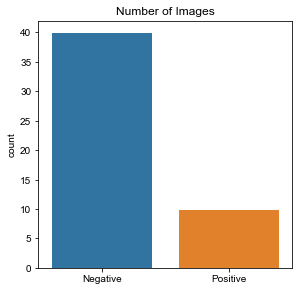

In [19]:
Im = []
for i in Dataset:
    if(i[1] == 0):
        Im.append("Negative")
    elif(i[1] == 1):
        Im.append("Positive")

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.set_style('darkgrid')
axl = sns.countplot(Im)
axl.set_title("Number of Images")

In [20]:
x = []
y = []

for feature, label in Dataset:
    x.append(feature)
    y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 1)
x = x / 255
y = np.array(y)

(-0.5, 119.5, 119.5, -0.5)

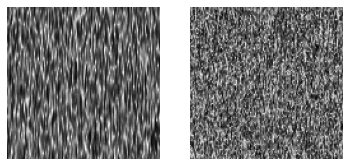

In [22]:
plt.subplot(1, 2, 1)
plt.imshow(x[10].reshape(img_size, img_size), cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x[45].reshape(img_size, img_size), cmap='gray')
plt.axis('off')

In [23]:
model = Sequential()
model.add(Conv2D(64,3,padding="same", activation="relu", input_shape = x.shape[1:]))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(128, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 128)      0

In [24]:
opt = Adam(lr=1e-5)

model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"]) 

history = model.fit(x, y, epochs = 150, batch_size = 50, validation_split = 0, verbose=1)

Epoch 1/150
1/1 [==============================] - 1s 935ms/step - loss: 0.7958 - accuracy: 0.4800
Epoch 2/150
1/1 [==============================] - 0s 435ms/step - loss: 0.8881 - accuracy: 0.3600
Epoch 3/150
1/1 [==============================] - 0s 468ms/step - loss: 0.8790 - accuracy: 0.4400
Epoch 4/150
1/1 [==============================] - 0s 372ms/step - loss: 0.7782 - accuracy: 0.4800
Epoch 5/150
1/1 [==============================] - 0s 398ms/step - loss: 0.8865 - accuracy: 0.5600
Epoch 6/150
1/1 [==============================] - 0s 392ms/step - loss: 0.7817 - accuracy: 0.5200
Epoch 7/150
1/1 [==============================] - 0s 399ms/step - loss: 0.6948 - accuracy: 0.6000
Epoch 8/150
1/1 [==============================] - 0s 409ms/step - loss: 0.7984 - accuracy: 0.5000
Epoch 9/150
1/1 [==============================] - 0s 381ms/step - loss: 0.7196 - accuracy: 0.6400
Epoch 10/150
1/1 [==============================] - 0s 376ms/step - loss: 0.7158 - accuracy: 0.5800
Epoch 11/

In [25]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


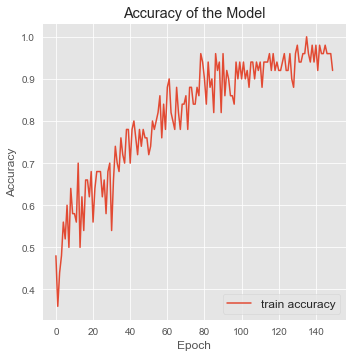

In [34]:
plt.figure(figsize=(12, 12))
plt.style.use('ggplot')
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])  # 验证集
plt.title('Accuracy of the Model')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right', prop={'size': 12})

# 验证集
# plt.subplot(2,2,2)
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Loss of the Model')
# plt.ylabel('Loss', fontsize=12)
# plt.xlabel('Epoch', fontsize=12)
# plt.legend(['train loss', 'validation loss'], loc='best', prop={'size': 12})

In [27]:
# os.walk方法用于通过在目录树中游走输出在目录中的文件名
def getTestFileList(path):
    for root, dirs, files in os.walk(path):
        return files
testfile_name = getTestFileList(file_test)

In [28]:
testfile = []
for name in testfile_name:
    if os.path.splitext(name)[0].split('_')[0] == '02':
        testfile.append(name)
testfile

['02_0001.PNG',
 '02_0002.PNG',
 '02_0003.PNG',
 '02_0004.PNG',
 '02_0005.PNG',
 '02_0006.PNG',
 '02_0007.PNG',
 '02_0008.PNG',
 '02_0009.PNG',
 '02_0010.PNG',
 '02_0011.PNG',
 '02_0012.PNG',
 '02_0013.PNG',
 '02_0014.PNG',
 '02_0015.PNG',
 '02_0016.PNG',
 '02_0017.PNG',
 '02_0018.PNG',
 '02_0019.PNG',
 '02_0020.PNG']

In [29]:
x.shape

(50, 120, 120, 1)

In [30]:
img_size = 120
def read_test_images(filelist,dirpath='../../test/Images/'):
    data = []
    for img in filelist:
        try:
            img_arr = cv2.imread(os.path.join(dirpath, img), cv2.IMREAD_GRAYSCALE)
            resized_arr = cv2.resize(img_arr, (img_size, img_size)) 
            data.append([resized_arr])
        except Exception as e:
            print(e)
    return np.array(data)

TestDataset = read_test_images(testfile)
TestDataset.shape

(20, 1, 120, 120)

In [31]:
test = []

for feature in TestDataset:
    test.append(feature)

test = np.array(test).reshape(-1, img_size, img_size, 1)
test = test / 255

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(test)
predictions

1/1 [==============================] - 0s 125ms/step


array([[0.51607805, 0.48392195],
       [0.51046354, 0.4895364 ],
       [0.5235808 , 0.47641918],
       [0.52114695, 0.47885302],
       [0.5198876 , 0.48011237],
       [0.50508493, 0.49491504],
       [0.5220571 , 0.4779429 ],
       [0.50267386, 0.49732617],
       [0.52205044, 0.4779496 ],
       [0.50750834, 0.49249163],
       [0.5076927 , 0.4923074 ],
       [0.5266638 , 0.47333625],
       [0.50632656, 0.49367344],
       [0.5105359 , 0.48946413],
       [0.50220704, 0.49779296],
       [0.52174073, 0.4782592 ],
       [0.51768434, 0.48231563],
       [0.52839506, 0.47160494],
       [0.5043066 , 0.4956934 ],
       [0.5134558 , 0.48654422]], dtype=float32)